## The very very basics of ML. With R.

Experiment freely. This is a hands-on (brains off!) experience!

In [46]:
options(warn = -1)

working_dir <- '~' ## If runing locally, replace with the path to the folder in which you saved the notebooks (e.g. 'C:/Documents/mlTeachings') 
setwd(working_dir)

source('src/lib.R')

df = get_partitioned_df()

info = getModelInfo()

data_name = 'spirals'

## Support Vector Machines

As we said, a SVM tries finding the best separating hyperplane in a d-dimensional kernel space.

Quite naively, a properly trained SVM mode draws a good separating line between points of different classes.

The equation of the separating hyperplane can be written as:

$$f(x) = \beta_0 +  \sum_{i \in S}\alpha_iK(x_i, x_{i'})$$

in general, given the unlabelled observation *$x_{test}$*, if $f(x_{test}) > 0$, then $x_{test}$ will be classified to one class, and vice versa.

where:

* $S$ is the number of support vectors (i.e. points in the d-dimensional hyperspace)\*

* $\beta_0$ is the *offset* parameter ( = 0 in the implementation of the *svmPoly* $\texttt{R}$ function)

* $\alpha_i$ is the *scale* parameter 

We start out with the the **polynomial kernel**:

* $K(x_i, x_{i'}) = (1+\sum_{j=1}^{p}x_{ij}x_{i'j})^d$ is the *polynomial kernel*


\* food for though: what are the similarities with the KNN kernel function? what the differences?

In [35]:
## choose the algorithm

algorithm = 'svmPoly'

info = getModelInfo()
info[[algorithm]]$parameters

## set the hyperparameters

degree = 1
scale = 1
cost = 1

hyperparameters = data.frame('degree' = degree,
                             'scale' = scale,
                             'C' = cost)

parameter,class,label
degree,numeric,Polynomial Degree
scale,numeric,Scale
C,numeric,Cost


C is the *cost* parameter: the higher it is, the lower is the tolerance for misclassified points. Remember hard/soft margins? Well, C is the hyperparameter that manages the tradeoff between variance (ability to correctly deal with outliers) and bias in the final model (ability to correctly discriminate between classes). If set too high, it may result in overfitting the data, hence into bad predictions.

![A support vector classifier was fit using four different values of the tuning parameter C . The largest value of C was used in the top left panel, and smaller values were used in the top right, bottom left, and bottom right panels. When C is large, then there is a high tolerance for observations being on the wrong side of the margin, and so the margin will be large. As C decreases, the tolerance for observations being on the wrong side of the margin decreases, and the margin narrows.](../fig/cost_parameter_svm.PNG)

In [36]:
## train the model

model = train(y = df[[data_name]]$y_train$class,
           x = df[[data_name]]$x_train,
           method = algorithm,
           tuneGrid = hyperparameters,
           trControl = trainControl(method = 'boot',
                                    classProbs =  TRUE)
           )

maximum number of iterations reached -2.271877e-05 2.272017e-05maximum number of iterations reached 0.0008934186 -0.0008930836maximum number of iterations reached 3.851859e-05 -3.851833e-05

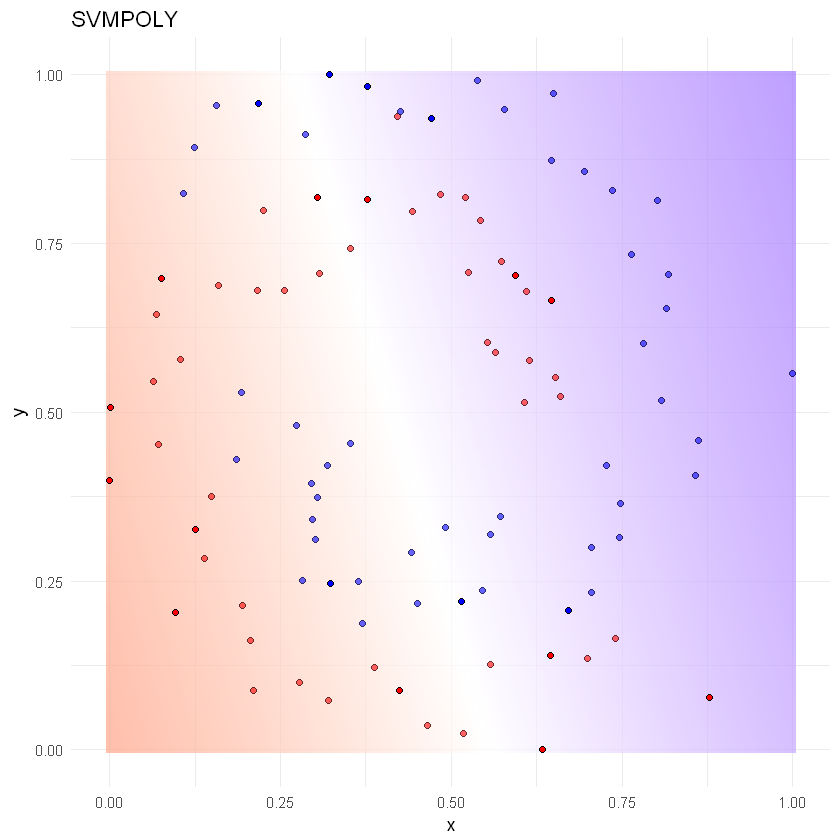

In [37]:
plot_model(df, data_name, model)

Pretty bad, don't you think? This is because we set a 1-degree polynomial kernel (which is actually a linear kernel, where the data are clearly not linearly separable). With this approach, the SVM degenerates to a simpler Support Vector *Classifier*, which ofc is much less powerful as it does not explore higher dimensional spaces to find the separating hyperplane. 

### Tweak SVM Hyperparameters

Let's profit of the *kernel trick* and try changing some hyperparatemers.

In [38]:
## set the hyperparameters

degree = 3
scale = 0.33
cost = 3

hyperparameters = data.frame('degree' = degree,
                             'scale' = scale,
                             'C' = cost)

In [39]:
## train the model

model = train(y = df[[data_name]]$y_train$class,
           x = df[[data_name]]$x_train,
           method = algorithm,
           tuneGrid = hyperparameters,
           trControl = trainControl(method = 'boot',
                                    classProbs =  TRUE)
           )

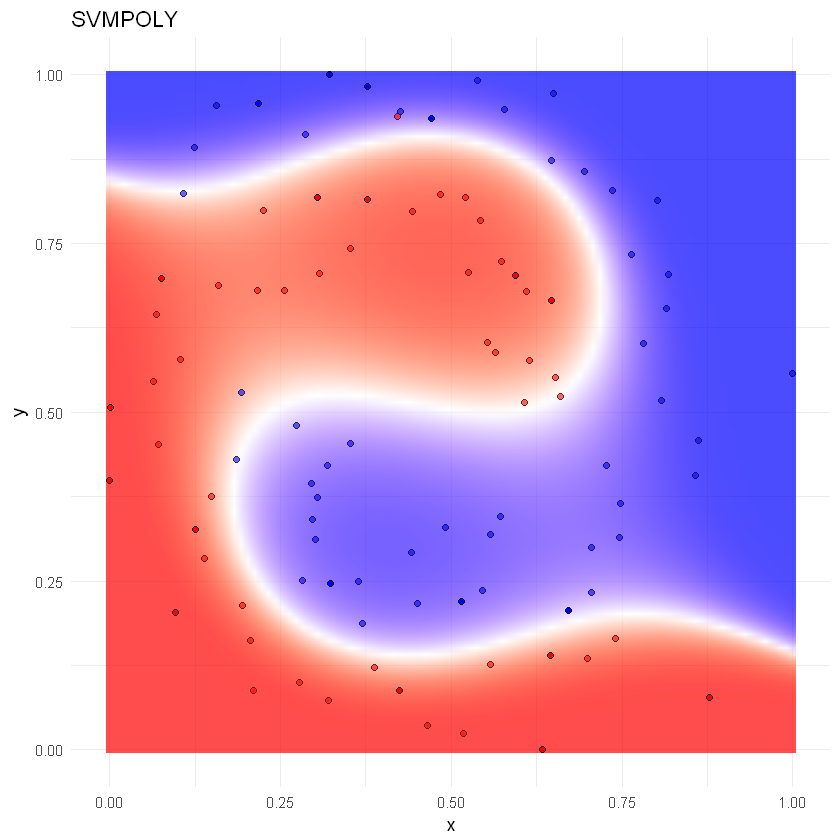

In [40]:
plot_model(df, data_name, model)

Now change kernel type and go for a **radial kernel**:

$$K(x_i, x_{i'}) = \exp\big(-\gamma \sum_{j=1}^{p}(x_{ij}-x_{i'j})^2\big)$$

where:

* $\gamma = \frac{1}{\sqrt{2\sigma}}$ is the *scale* parameter, which set the speed of the exponential decay
* Oh, this looks is suspiciously similar to the gaussian kernel in the kernelized KNN example...

In [41]:
algorithm = 'svmRadial'

info[[algorithm]]$parameters

parameter,class,label
sigma,numeric,Sigma
C,numeric,Cost


Cost has the same interpretation as of above.

In [42]:
model = train(y = df[[data_name]]$y_train$class,
           x = df[[data_name]]$x_train,
           method = algorithm,
           trControl = trainControl(method = 'boot',
                                    classProbs =  TRUE)
           )

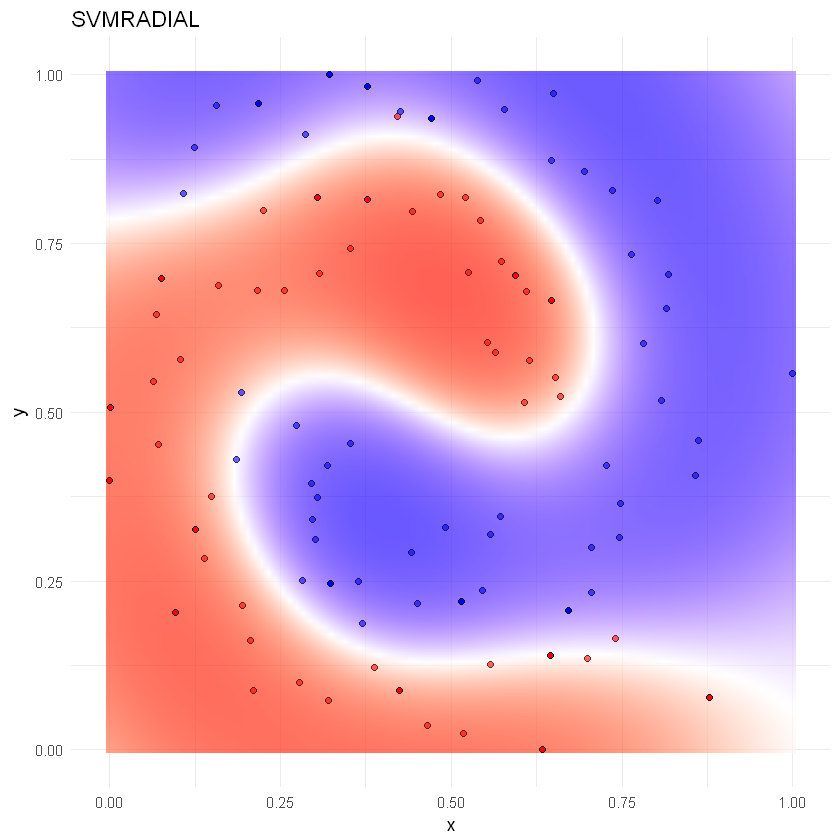

In [43]:
plot_model(df, data_name, model)